<a href="https://colab.research.google.com/github/Nassim-Hb/Python_project/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#First we add all the libraries and we import the dateset file that we have in our folder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from google.colab import files
data_to_load = files.upload()

Saving Dataset_lol_s13.csv to Dataset_lol_s13 (3).csv


In [ ]:
#We read the dataset and we can see that there is 244 rows
import io
df = pd.read_csv(io.BytesIO(data_to_load['Dataset_lol_s13.csv']), sep= ';')
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26
...,...,...,...,...,...,...,...,...,...,...,...
239,Zilean,Support,MID,A,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
240,Zilean,Support,SUPPORT,A,48.35,-2.49,50.95,79.72,2.67,1.40,3.11
241,Zoe,Mage,MID,A,48.46,2.43,49.14,87.85,3.45,1.45,2.60
242,Zoe,Mage,SUPPORT,D,28.33,-3.55,47.73,10.03,0.37,1.45,2.14


The fact that there is 244 rows but only 162 champions it's because some champions can play in different roles as we can see line 2 and 3 Akali can be played in top and mid.

In [ ]:
#To have information concerning each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    244 non-null    object 
 1   Class   243 non-null    object 
 2   Role    244 non-null    object 
 3   Tier    244 non-null    object 
 4   Score   244 non-null    float64
 5   Trend   244 non-null    float64
 6   Win %   244 non-null    float64
 7   Role %  244 non-null    float64
 8   Pick %  244 non-null    float64
 9   Ban %   244 non-null    float64
 10  KDA     244 non-null    float64
dtypes: float64(7), object(4)
memory usage: 21.1+ KB


DATA TRANSFORMATION + DATA WRANGLING

In [ ]:
#Now we create another dateframe to see which champions have the best winrate
winrate = df.sort_values(by=['Win %'], ascending = False)
winrate.head(20)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
166,Singed,Tank,MID,A,51.22,-7.41,55.15,19.51,0.50,0.61,2.83
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
89,Kled,Fighter,MID,B,47.23,-4.27,53.93,11.75,0.29,0.95,2.65
115,Nasus,Fighter,MID,B,46.24,-3.06,53.66,14.69,0.52,4.19,2.39
239,Zilean,Support,MID,A,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
77,Karthus,Mage,ADC,C,36.72,1.43,53.28,26.01,0.93,1.67,2.28
136,Quinn,Marksman,TOP,A,48.15,4.40,53.27,77.05,1.30,0.60,1.93
232,Zac,Tank,TOP,A,53.65,2.22,53.24,13.56,1.29,14.77,2.73
9,Anivia,Mage,MID,S,59.33,9.21,53.22,86.04,3.60,3.56,3.03
27,Cho'Gath,Tank,MID,B,45.34,-1.60,53.13,20.82,0.45,0.76,2.47


In [ ]:
#Here we can find a rank of the pickrate of every champions, I put only the first 10 champions
pickrate = df.sort_values(by=['Pick %'], ascending = False)
pickrate.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
23,Caitlyn,Marksman,ADC,God,93.30,1.35,50.37,96.12,20.28,18.56,2.30
72,Kai'Sa,Marksman,ADC,God,81.95,-1.78,50.83,96.92,18.91,3.81,2.51
39,Ezreal,Marksman,ADC,God,74.09,-4.86,48.39,94.75,18.55,3.53,2.40
69,Jhin,Marksman,ADC,God,83.12,3.82,51.43,92.56,17.41,3.40,3.06
99,Lux,Mage,SUPPORT,God,93.53,0.79,51.19,70.69,13.65,10.76,2.56
113,Nami,Support,SUPPORT,God,91.91,5.24,51.61,99.70,13.02,6.89,3.29
65,Jax,Fighter,TOP,God,93.31,27.78,51.94,85.83,12.04,21.85,1.75
153,Samira,Marksman,ADC,God,75.02,5.30,52.01,98.08,11.97,26.31,2.37
224,Yasuo,Fighter,MID,God,83.58,14.87,49.44,72.19,11.73,19.86,1.75
200,Varus,Marksman,ADC,S,59.60,4.29,50.18,85.55,11.57,3.82,2.42


In [ ]:
#Here we can find a rank of the banrate of every champions, I put only the first 10 champions
banrate = df.sort_values(by=['Ban %'], ascending = False)
banrate.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
234,Zed,Assassin,JUNGLE,D,34.73,-23.06,44.36,18.28,2.27,36.90,2.31
233,Zed,Assassin,MID,God,88.26,1.05,48.68,77.39,10.00,36.90,2.22
79,Kassadin,Assassin,MID,God,88.29,26.27,52.30,97.44,7.72,36.28,2.71
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
106,Maokai,Tank,SUPPORT,A,48.63,0.76,51.42,20.67,2.63,27.50,2.27
153,Samira,Marksman,ADC,God,75.02,5.30,52.01,98.08,11.97,26.31,2.37
112,Morgana,Mage,SUPPORT,God,71.50,-8.61,50.06,89.94,7.26,25.67,2.52
177,Sylas,Mage,MID,God,68.15,6.88,49.61,43.68,7.47,22.96,2.17
176,Sylas,Mage,JUNGLE,God,74.63,-16.47,49.50,50.53,8.73,22.96,2.52
30,Darius,Fighter,TOP,God,77.98,-7.00,49.88,94.72,9.34,22.42,1.87


In [ ]:
#Here we can find a rank of the KDA of every champions, I put only the first 10 champions
kda_df = df.sort_values(by=['KDA'], ascending = False)
kda_df.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
230,Yuumi,Support,SUPPORT,S,64.45,-25.55,44.44,98.81,7.96,19.86,3.88
61,Ivern,Support,JUNGLE,B,44.56,11.20,50.92,80.70,1.13,0.44,3.66
239,Zilean,Support,MID,A,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
231,Zac,Tank,JUNGLE,God,70.73,7.78,52.12,69.42,6.49,14.77,3.53
222,Xerath,Mage,MID,B,47.33,-0.79,50.34,27.42,1.36,3.11,3.30
113,Nami,Support,SUPPORT,God,91.91,5.24,51.61,99.70,13.02,6.89,3.29
154,Sejuani,Tank,JUNGLE,A,54.13,3.34,50.69,81.96,4.31,0.91,3.27
63,Janna,Support,SUPPORT,A,56.18,-6.27,51.30,97.90,4.50,1.50,3.18
75,Karma,Mage,MID,B,47.01,0.00,50.63,10.41,1.29,3.42,3.17
139,Rammus,Tank,JUNGLE,A,49.09,-29.03,51.19,90.80,2.64,8.72,3.13


In [ ]:
#We can also see the best winrate of every champions with at least a minimum 3% of pickrate
pickrate_bigger_than_3 = winrate[winrate['Pick %'] > 3]
pickrate_bigger_than_3.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
9,Anivia,Mage,MID,S,59.33,9.21,53.22,86.04,3.60,3.56,3.03
172,Sona,Support,SUPPORT,S,57.90,1.03,53.03,97.61,4.29,0.27,2.99
7,Amumu,Tank,JUNGLE,S,57.41,16.78,52.87,49.07,4.44,5.20,2.82
197,Udyr,Fighter,JUNGLE,S,67.49,-18.46,52.54,80.53,6.18,19.75,2.72
8,Amumu,Tank,SUPPORT,A,52.62,1.09,52.39,50.05,4.09,5.20,2.18
37,Elise,Mage,JUNGLE,God,69.88,16.71,52.37,96.95,6.93,11.73,2.90
79,Kassadin,Assassin,MID,God,88.29,26.27,52.30,97.44,7.72,36.28,2.71
58,Illaoi,Fighter,TOP,A,55.97,2.28,52.29,94.06,4.55,6.75,1.48
124,Olaf,Fighter,TOP,A,52.96,3.76,52.21,80.16,3.34,2.37,1.87


In [ ]:
#We specify only for jungle role so we can have all the jungle champions with the most winrate and with a minimum of 3% pickrate
pickrate_bigger_than_3_jungle = pickrate_bigger_than_3[pickrate_bigger_than_3['Role'] == 'JUNGLE']
pickrate_bigger_than_3_jungle.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
7,Amumu,Tank,JUNGLE,S,57.41,16.78,52.87,49.07,4.44,5.20,2.82
197,Udyr,Fighter,JUNGLE,S,67.49,-18.46,52.54,80.53,6.18,19.75,2.72
37,Elise,Mage,JUNGLE,God,69.88,16.71,52.37,96.95,6.93,11.73,2.90
231,Zac,Tank,JUNGLE,God,70.73,7.78,52.12,69.42,6.49,14.77,3.53
40,Fiddlesticks,Mage,JUNGLE,A,52.68,4.53,52.09,85.92,3.68,2.87,2.84
209,Vi,Fighter,JUNGLE,S,59.27,2.89,51.82,96.07,5.96,1.49,2.58
218,Wukong,Fighter,JUNGLE,S,58.65,5.14,51.41,77.35,5.62,2.71,2.80
35,Ekko,Assassin,JUNGLE,S,65.07,-5.43,50.98,71.07,7.27,6.21,2.81
18,Bel'Veth,Fighter,JUNGLE,A,49.90,-3.44,50.94,94.30,3.89,8.20,2.39


In [ ]:
pickrate_bigger_than_3_mid = pickrate_bigger_than_3[pickrate_bigger_than_3['Role'] == 'MID']
pickrate_bigger_than_3_mid.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
9,Anivia,Mage,MID,S,59.33,9.21,53.22,86.04,3.60,3.56,3.03
79,Kassadin,Assassin,MID,God,88.29,26.27,52.30,97.44,7.72,36.28,2.71
100,Lux,Mage,MID,S,63.16,4.64,51.54,26.49,5.12,10.76,3.03
104,Malzahar,Mage,MID,A,52.98,-0.67,51.52,90.90,3.69,3.69,2.35
208,Vex,Mage,MID,S,57.42,2.30,51.27,94.12,4.79,6.57,2.47
211,Viktor,Mage,MID,S,58.97,3.79,51.10,95.85,5.76,2.89,2.32
96,Lissandra,Mage,MID,A,51.49,6.18,50.81,93.66,3.53,0.89,2.52
59,Irelia,Fighter,MID,S,63.06,8.17,50.75,50.98,6.70,16.82,1.85
227,Yone,Assassin,MID,God,67.90,6.47,50.42,63.80,8.52,10.53,1.94
151,Ryze,Mage,MID,S,64.07,23.14,50.06,88.06,7.45,4.14,2.47


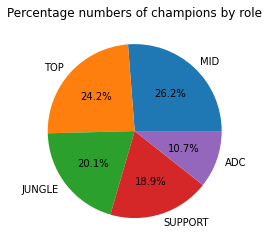

In [ ]:
#Here is a method to count the number of champions by role
role_counts = df["Role"].value_counts()
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%')
plt.title("Percentage numbers of champions by role")
plt.show()

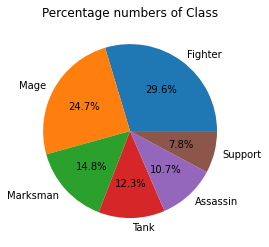

In [ ]:
#Here is a method to count the number of class
role_counts = df["Class"].value_counts()
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%')
plt.title("Percentage numbers of Class")
plt.show()

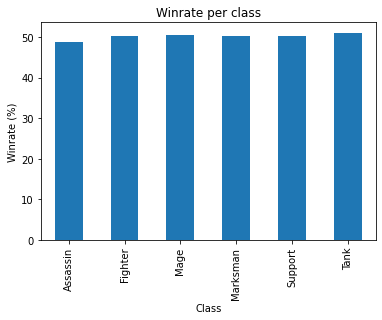

In [ ]:
#Here we have the winrate of each class of champions, tank is the winner
df_class = df[["Role", "Class", "Win %"]]
class_winrates = df_class.groupby("Class")["Win %"].mean()
fig, ax = plt.subplots()
class_winrates.plot(kind="bar", ax=ax)
plt.title("Winrate per class")
plt.xlabel("Class")
plt.ylabel("Winrate (%)")
plt.show()

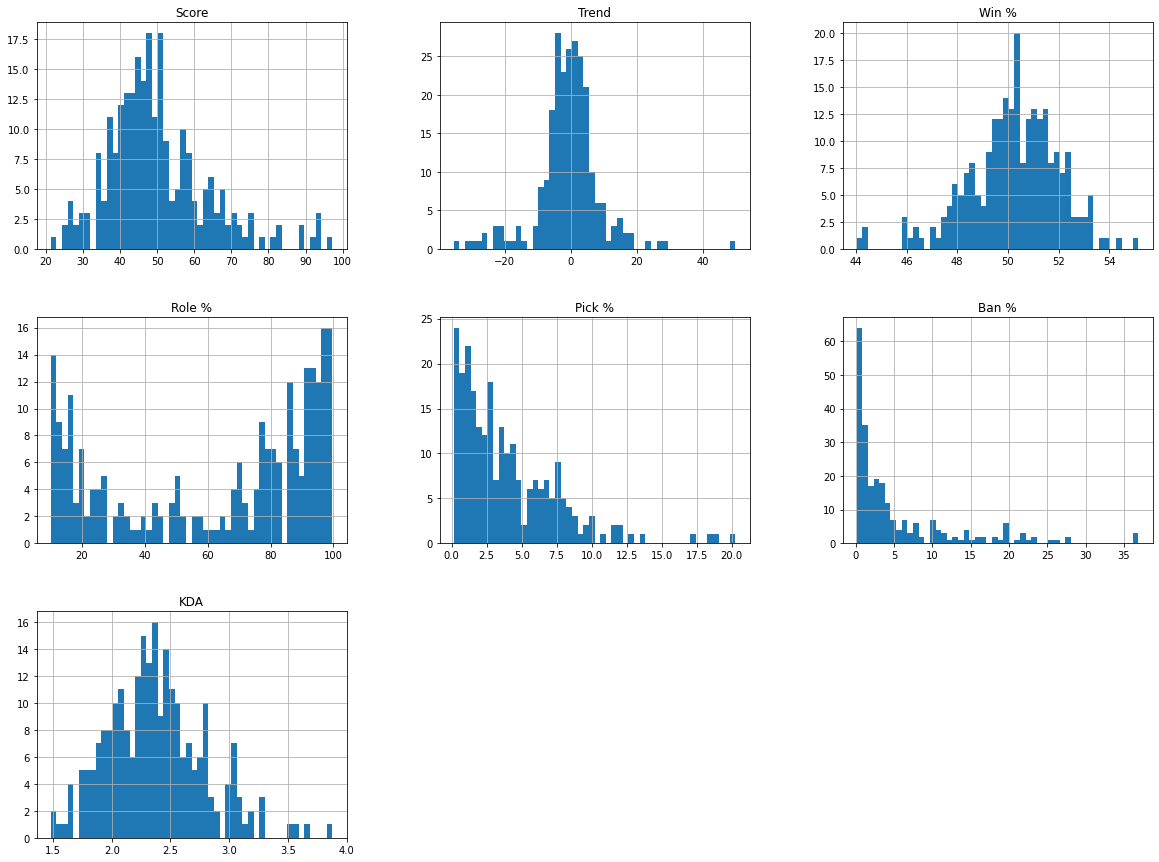

In [ ]:
# We can visualize the distribution of each column using histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Check if there are any missing values in the DataFrame
print(df.isnull().sum())

Name      0
Class     1
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64


In [ ]:
#There is only one missing value concerning the class name of K'SANTE the new champion they didnt gave him a class so I will add FIGHTER
df.loc[df['Name'] == "K'Sante", 'Class'] = 'Fighter'
print(df.isnull().sum())
#Now we can see that there is no more missing value

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64


Now I want to remove all the rows of champions with a pickrate less than 0.5 because this is not interesting those champions are played only by a little percentage of players and I think this is not usefull for our data exploration.

In [ ]:
df.dropna(subset=['Pick %'], inplace=True)
df = df[df['Pick %'] >= 0.5]
pickrate = df.sort_values(by=['Pick %'], ascending = True)
pickrate

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
166,Singed,Tank,MID,A,51.22,-7.41,55.15,19.51,0.50,0.61,2.83
26,Cassiopeia,Mage,TOP,B,44.55,2.69,52.77,13.88,0.51,1.68,1.95
115,Nasus,Fighter,MID,B,46.24,-3.06,53.66,14.69,0.52,4.19,2.39
193,Tryndamere,Fighter,MID,B,42.39,-3.89,52.21,16.88,0.55,2.44,2.17
180,Tahm Kench,Support,SUPPORT,D,29.71,-7.38,47.63,23.21,0.55,0.79,2.34
...,...,...,...,...,...,...,...,...,...,...,...
99,Lux,Mage,SUPPORT,God,93.53,0.79,51.19,70.69,13.65,10.76,2.56
69,Jhin,Marksman,ADC,God,83.12,3.82,51.43,92.56,17.41,3.40,3.06
39,Ezreal,Marksman,ADC,God,74.09,-4.86,48.39,94.75,18.55,3.53,2.40
72,Kai'Sa,Marksman,ADC,God,81.95,-1.78,50.83,96.92,18.91,3.81,2.51


Now we have only champions with a pickrate greater than 0.5 so we removed 21 rows

In [ ]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26
...,...,...,...,...,...,...,...,...,...,...,...
236,Ziggs,Mage,MID,B,43.49,-4.52,50.44,56.28,1.40,0.23,2.51
237,Ziggs,Mage,ADC,D,35.28,-3.69,51.96,32.03,0.74,0.23,2.60
240,Zilean,Support,SUPPORT,A,48.35,-2.49,50.95,79.72,2.67,1.40,3.11
241,Zoe,Mage,MID,A,48.46,2.43,49.14,87.85,3.45,1.45,2.60


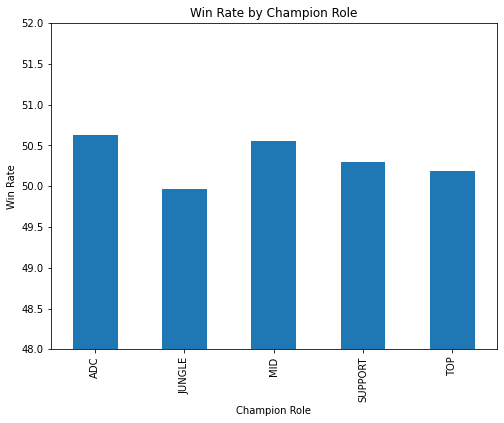

In [ ]:
# Group the data by role and calculate the mean win rate for each role
win_rate_by_role = df.groupby("Role")["Win %"].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
win_rate_by_role.plot(kind="bar", ax=ax)

# Set the chart title and axis labels
ax.set_title("Win Rate by Champion Role")
ax.set_xlabel("Champion Role")
ax.set_ylabel("Win Rate")
ax.set_ylim(48, 52) # Set win rate axis limits between 48 and 52
plt.show()

As we can see we have the distribution of roles according to their winrate and adc (ad carry) is the role with best winrate, we can see it with another method

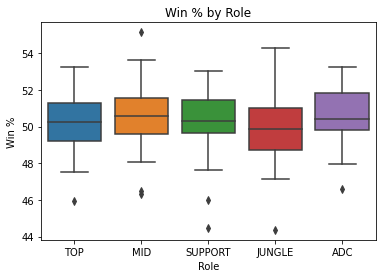

In [ ]:
sns.boxplot(x='Role', y='Win %', data=df)
plt.title('Win % by Role')
plt.show()

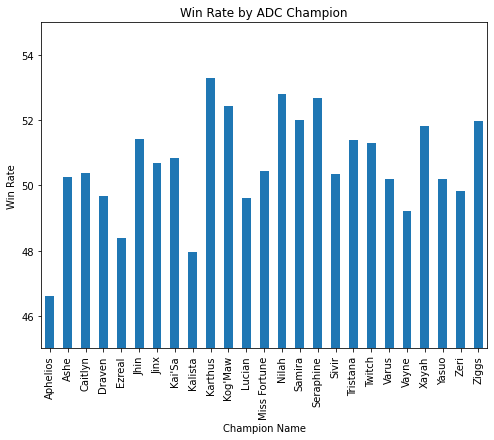

In [ ]:
# Only include ADC champions
adc_df = df[df["Role"] == "ADC"]

# Group the data by champion name and calculate the mean win rate for each champion
win_rate_by_champion = adc_df.groupby("Name")["Win %"].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
win_rate_by_champion.plot(kind="bar", ax=ax)

# Set the chart title and axis labels
ax.set_title("Win Rate by ADC Champion")
ax.set_xlabel("Champion Name")
ax.set_ylabel("Win Rate")
ax.set_ylim(45, 55) # Set win rate axis limits between 45 and 55
plt.show()

We have the distribution of every adc champions with their respective winrate and the best winrate is Karthus (I agree actually Karthus is very strong)
So basically if a player is a main Karthus and he plays him in ADC role he will have a winrate > 50 according to statistics

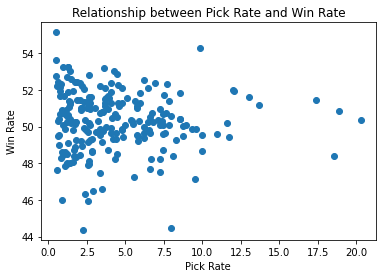

In [ ]:
# Create a scatter plot to show the relationship between pick rate and win rate
plt.scatter(df['Pick %'], df['Win %'])
plt.xlabel('Pick Rate')
plt.ylabel('Win Rate')
plt.title('Relationship between Pick Rate and Win Rate')
plt.show()

Here we have the relashionship between pick and win rate

In [ ]:
pickrate = df.sort_values(by=['Pick %'], ascending = False)
pickrate.head(15)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
23,Caitlyn,Marksman,ADC,God,93.30,1.35,50.37,96.12,20.28,18.56,2.30
72,Kai'Sa,Marksman,ADC,God,81.95,-1.78,50.83,96.92,18.91,3.81,2.51
39,Ezreal,Marksman,ADC,God,74.09,-4.86,48.39,94.75,18.55,3.53,2.40
69,Jhin,Marksman,ADC,God,83.12,3.82,51.43,92.56,17.41,3.40,3.06
99,Lux,Mage,SUPPORT,God,93.53,0.79,51.19,70.69,13.65,10.76,2.56
113,Nami,Support,SUPPORT,God,91.91,5.24,51.61,99.70,13.02,6.89,3.29
65,Jax,Fighter,TOP,God,93.31,27.78,51.94,85.83,12.04,21.85,1.75
153,Samira,Marksman,ADC,God,75.02,5.30,52.01,98.08,11.97,26.31,2.37
224,Yasuo,Fighter,MID,God,83.58,14.87,49.44,72.19,11.73,19.86,1.75
200,Varus,Marksman,ADC,S,59.60,4.29,50.18,85.55,11.57,3.82,2.42


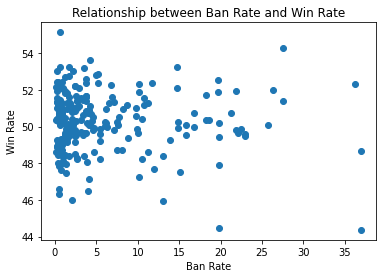

In [ ]:
# Create a scatter plot to show the relationship between ban rate and win rate
plt.scatter(df['Ban %'], df['Win %'])
plt.xlabel('Ban Rate')
plt.ylabel('Win Rate')
plt.title('Relationship between Ban Rate and Win Rate')
plt.show()

Here is the relationship between ban and win rate

In [ ]:
banrate.head(15)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
234,Zed,Assassin,JUNGLE,D,34.73,-23.06,44.36,18.28,2.27,36.90,2.31
233,Zed,Assassin,MID,God,88.26,1.05,48.68,77.39,10.00,36.90,2.22
79,Kassadin,Assassin,MID,God,88.29,26.27,52.30,97.44,7.72,36.28,2.71
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
106,Maokai,Tank,SUPPORT,A,48.63,0.76,51.42,20.67,2.63,27.50,2.27
153,Samira,Marksman,ADC,God,75.02,5.30,52.01,98.08,11.97,26.31,2.37
112,Morgana,Mage,SUPPORT,God,71.50,-8.61,50.06,89.94,7.26,25.67,2.52
177,Sylas,Mage,MID,God,68.15,6.88,49.61,43.68,7.47,22.96,2.17
176,Sylas,Mage,JUNGLE,God,74.63,-16.47,49.50,50.53,8.73,22.96,2.52
30,Darius,Fighter,TOP,God,77.98,-7.00,49.88,94.72,9.34,22.42,1.87


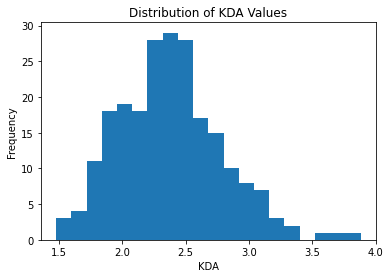

In [ ]:
# Create a histogram to show the distribution of KDA values
plt.hist(df['KDA'], bins=20)
plt.xlabel('KDA')
plt.ylabel('Frequency')
plt.title('Distribution of KDA Values')
plt.show()

The KDA is the formula kill + assistance divided by the number of deaths. We see that the majority of champions have a kda between 2 and 3 which is normal. A player with a kda greater than 3.5 is considered very strong on his champion, on the other hand a player with a kda less than 2 is considered weak

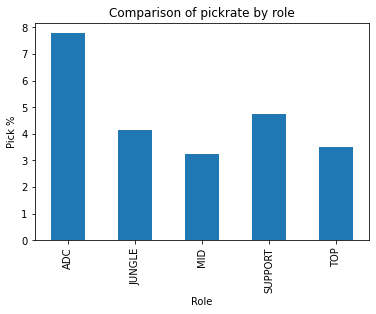

In [ ]:
# Create a pivot table to aggregate pickrate by role
role_pickrate = df.pivot_table(index="Role", values="Pick %")

# Create a bar plot to compare pickrate by role
role_pickrate.plot(kind="bar", legend=None)
plt.xlabel("Role")
plt.ylabel("Pick %")
plt.title("Comparison of pickrate by role")
plt.show()

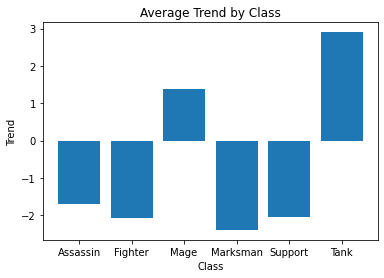

In [ ]:
# Group the data by class and calculate the mean trend
class_trend = df.groupby("Class")["Trend"].mean()

# Create a bar plot
plt.bar(class_trend.index, class_trend.values)
plt.xlabel("Class")
plt.ylabel("Trend")
plt.title("Average Trend by Class")
plt.show()

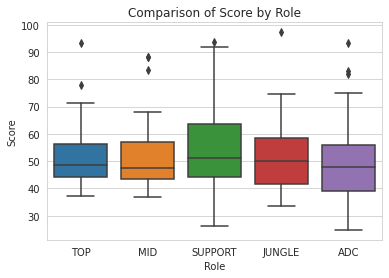

In [ ]:
sns.set_style("whitegrid")

# Create a boxplot of the scores by role
sns.boxplot(x="Role", y="Score", data=df)

# Set the title and labels
plt.title("Comparison of Score by Role")
plt.xlabel("Role")
plt.ylabel("Score")

# Show the plot
plt.show()

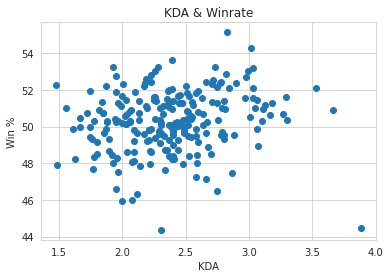

In [ ]:
plt.scatter(df['KDA'], df['Win %'])
plt.xlabel('KDA')
plt.ylabel('Win %')
plt.title('KDA & Winrate')
plt.show()

Here we can see the relationship between kda and winrate, all the KDA > 3 have a winrate greater than 50%

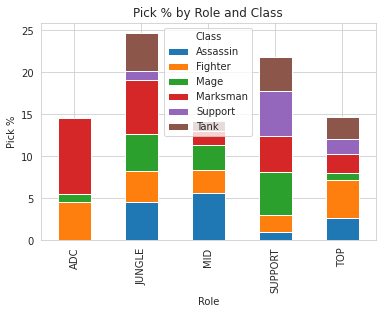

In [ ]:
pick_pct = pd.pivot_table(df, values='Pick %', index=['Role'], columns=['Class'], aggfunc='mean')

pick_pct.plot(kind='bar', stacked=True)
plt.title('Pick % by Role and Class')
plt.xlabel('Role')
plt.ylabel('Pick %')
plt.show()

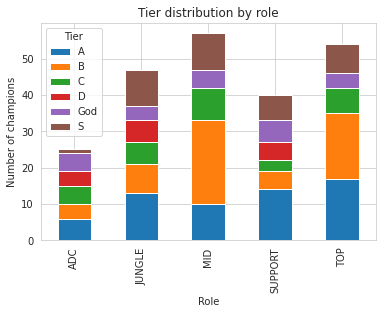

In [ ]:
# Create a pivot table to count the number of champions in each tier for each role
tier_counts = pd.pivot_table(df, values="Name", index="Role", columns="Tier", aggfunc="count")
tier_counts.plot(kind="bar", stacked=True)
plt.xlabel("Role")
plt.ylabel("Number of champions")
plt.title("Tier distribution by role")
plt.show()

Clustering model

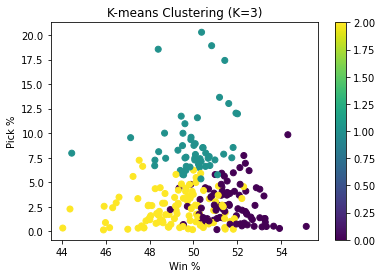

In [37]:
# Select the features to use for clustering
X = df[["Win %", "Pick %", "KDA"]]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
k = 3

# Train the K-means clustering model
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_
df["Cluster"] = labels
fig, ax = plt.subplots()
scatter = ax.scatter(df["Win %"], df["Pick %"], c=labels, cmap="viridis")
ax.set_xlabel("Win %")
ax.set_ylabel("Pick %")
ax.set_title("K-means Clustering (K={})".format(k))
plt.colorbar(scatter)
plt.show()